In [ ]:
import pandas as pd
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import seaborn as sns

from PIL import Image

df=pd.read_csv("/content/drive/MyDrive/dataset_twitter/twitter_dataset.csv")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [21]:
df

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35


In [ ]:
df["Retweets"].unique() #genera un array con los valores unicos para verificar que no hayan datos dañados o que no existan

array([  2,  35,  51,  37,  27,  22,  12,   0,  15,  97,  82,  99,  20,
         3,  43,  55,  86,  61,  36,  29,  75,  73,  89,  60,  76,  54,
        94,  24,  13,  62,  53,   4,  78,  79,  87,  66,  63,  14,  59,
        72,  70,  91,  46,  67,  65,  50,  83,  98,  42,  21,  96,  26,
         9,  77,  25,  80,  85,  49,  47,  88,  68,  84,  93,   7,  64,
        19,  16,  71,  45,  31,  39,   1,  74,  18,  23,  56,  58,  33,
         6,  38,   8,  17,  81,  11,  44,  52, 100,  28,  57,  90,  32,
         5,  34,  41,  48,  95,  40,  10,  92,  30,  69])

In [ ]:
# remueve duplicados
df = df.drop_duplicates()

# Remueve datos vacios
df = df.dropna()

# reemplaza caracteres especiales y de url 
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


<ipython-input-19-c57917d1649d>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
<ipython-input-19-c57917d1649d>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:
# Tokenize tweet text
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])

In [ ]:
# Perform sentiment analysis on tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034809


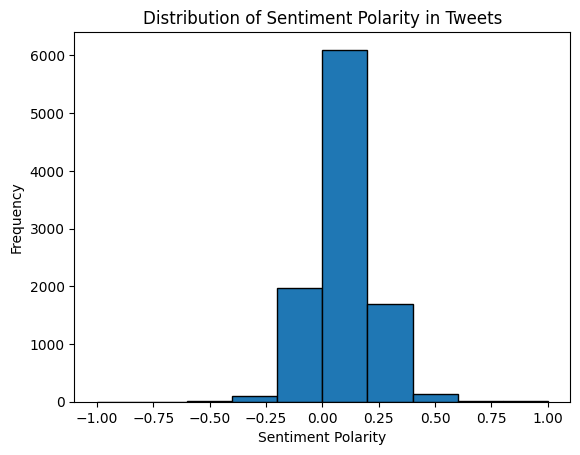

In [ ]:
# Plotting sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

In [ ]:
df

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,tokens,sentiment_polarity
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,"[parti, least, receiv, say, singl, ., prevent,...",0.115714
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,"[hotel, still, congress, may, member, staff, ....",0.308333
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,"[nice, debat, industri, year, ., film, gener, ...",0.220000
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,"[laugh, explain, situat, career, occur, seriou...",0.054762
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,"[involv, sens, former, often, approach, govern...",0.033333
...,...,...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20,"[agre, reflect, militari, box, abil, ever, hol...",-0.150000
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54,"[born, push, still, ., degre, sometim, control...",0.046667
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08,"[day, agent, like, region, ., teacher, data, m...",-0.090476
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35,"[guess, without, success, save, ., particular,...",0.253770


In [ ]:
df_sorted = df.sort_values(by='sentiment_polarity',ascending=False) #ordena el dataframe segun la columna de polaridada de sentimientos de positiovos a negativos 
df_sorted

In [ ]:
# proceso de carga 
df.to_csv('/content/drive/MyDrive/dataset_twitter/dataset_twitter_resultados.csv', index=False)